**jkrachm2 and zzarubi1**

**Joshua Krachman and Zachary Zarubin**

**Biomedical Data Science Lab Final**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
import random as rnd
import torch
import json

# inline plots
%matplotlib inline

from google.colab import drive
drive.mount('gdrive/')

Drive already mounted at gdrive/; to attempt to forcibly remount, call drive.mount("gdrive/", force_remount=True).


In [0]:
df=pd.read_csv('gdrive/My Drive/bmdslab/final/glm.training.data.csv')
dftest=pd.read_csv('gdrive/My Drive/bmdslab/final/glm.test.data.csv')
dftimestamps=pd.read_csv('gdrive/My Drive/bmdslab/final/timestamps.test.csv')
dfonsets=pd.read_csv('gdrive/My Drive/bmdslab/final/test.onsets.csv')

In [3]:
df.head(3)

,Unnamed: 0,x.hr,x.sbp,x.dbp,x.mbp,x.resp,x.temp,x.cvp,x.pao2,x.fio2,x.gcs,x.bili,x.platelets,x.creat,x.lactate,x.bun,x.ph,x.wbc,x.paco2,x.hgb,x.hct,x.potassium,x.urine,x.resp.sofa,x.nervous.sofa,x.cardio.sofa,x.liver.sofa,x.coag.sofa,x.kidney.sofa,y
0,1,87.252031,119.411786,61.039926,77.835458,20.242346,37.164892,15.309346,346.0,24.447134,9.268035,10.335779,232.129378,6.065923,1.893525,35.051098,7.49,13.000894,28.5,10.931866,30.624509,4.5,0.0,0,0,0.0,0,0,0,0
1,2,87.252031,119.411786,61.039926,77.835458,20.242346,37.164892,15.309346,346.0,24.447134,9.268035,10.335779,232.129378,6.065923,1.893525,35.051098,7.49,13.000894,28.5,10.931866,30.624509,4.5,0.0,0,0,0.0,0,0,0,0
2,3,87.252031,119.411786,61.039926,77.835458,20.242346,37.164892,15.309346,346.0,24.447134,9.268035,10.335779,232.129378,6.065923,1.893525,35.051098,7.49,13.000894,28.5,10.931866,30.624509,4.5,0.0,0,0,0.0,0,0,0,0


In [0]:
X=df[df.columns[df.columns!='y'] ].drop(df.columns[0], axis=1)
y=df[['y']]


In [0]:
y=y.to_numpy()
X=X.to_numpy()


from sklearn import preprocessing    
from sklearn.preprocessing import StandardScaler

StandardScaler(copy=True, with_mean=True, with_std=True)
scaler = preprocessing.StandardScaler().fit(X)


X = scaler.transform(X)  

y=np.hstack(y)



In [0]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10)



In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
numalphas = 9
accuracy_matrix = np.zeros((10,numalphas))
currentrow = -1
currentcol = -1;
alphasspec = [10**(-6), 10**(-5), 10**(-4), 10**(-3.5), 10**(-3), 10**(-2.5), 10**(-2.25), 10**(-2), 10**(-1)]

for train_index, test_index in kf.split(X,y):
     
    data_train   = X[train_index]
    target_train = y[train_index]

    data_test    = X[test_index]
    target_test  = y[test_index]
    
    currentrow = currentrow + 1;
    
    for i in alphasspec:

      clf = SGDClassifier(loss="log", penalty="l1", alpha = i, max_iter=5, class_weight = 'balanced')
      clf.fit(data_train,target_train)
      preds = clf.predict(data_test)
      try:
        accuracy=roc_auc_score(target_test,preds)
      except ValueError:
        pass 
      
      currentcol = currentcol + 1;
      accuracy_matrix[currentrow,currentcol] = accuracy

    currentcol = -1;
    
nsum = 0   

accuracy_matrix_avg = np.zeros(numalphas)   
for col in range (numalphas):
  
  for row in range(10):
    nsum = nsum + accuracy_matrix[row,col]
   
  accuracy_matrix_avg[col] = nsum / 10;
  nsum = 0;

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/

The best lambda to use in the list is:
[0.001]
This tells us the magnitude of lambda values to test


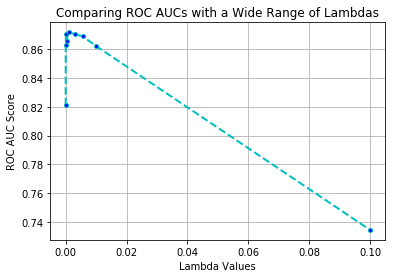

In [8]:
alphasspec = np.asarray(alphasspec)
correctalpha = alphasspec[np.where(accuracy_matrix_avg == np.amax(accuracy_matrix_avg))]
print('The best lambda to use in the list is:')
print(correctalpha)
print('This tells us the magnitude of lambda values to test')

fig, ax = plt.subplots()
ax.plot(alphasspec, accuracy_matrix_avg,  color='c', markerfacecolor='b', marker='o', linestyle='dashed', linewidth=2, markersize=4)

ax.set(xlabel='Lambda Values', ylabel='ROC AUC Score', title='Comparing ROC AUCs with a Wide Range of Lambdas')
ax.grid()
plt.savefig("gdrive/My Drive/bmdslab/final/number11.png")

In [9]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
numalphas = 12
accuracy_matrix = np.zeros((10,numalphas))
currentrow = -1
currentcol = -1;
alphasspec = [correctalpha*(0.3), correctalpha*(0.4), correctalpha*(0.5), correctalpha*(0.6),correctalpha*(0.7), correctalpha*(0.8), correctalpha*(0.9), correctalpha, correctalpha*(2), correctalpha*(3), correctalpha*(4), correctalpha*(5)]

for train_index, test_index in kf.split(X,y):
     
    data_train   = X[train_index]
    target_train = y[train_index]

    data_test    = X[test_index]
    target_test  = y[test_index]
    
    currentrow = currentrow + 1;
    
    for i in alphasspec:

      clf = SGDClassifier(loss="log", penalty="l1", alpha = i, max_iter=5, class_weight = 'balanced')
      clf.fit(data_train,target_train)
      preds = clf.predict(data_test)
      try:
        accuracy=roc_auc_score(target_test,preds)
      except ValueError:
        pass 
      
      currentcol = currentcol + 1;
      accuracy_matrix[currentrow,currentcol] = accuracy

    currentcol = -1;
    
nsum = 0   

accuracy_matrix_avg = np.zeros(numalphas)   
for col in range (numalphas):
  
  for row in range(10):
    nsum = nsum + accuracy_matrix[row,col]
   
  accuracy_matrix_avg[col] = nsum / 10;
  nsum = 0;


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/

The best lambda to use in the list is:
[[0.0008]]
This tells us a precise value of lambda to use


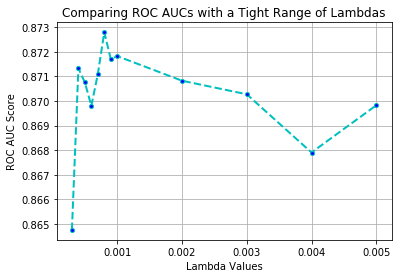

In [10]:
alphasspec = np.asarray(alphasspec)
correctalpha = alphasspec[np.where(accuracy_matrix_avg == np.amax(accuracy_matrix_avg))]
print('The best lambda to use in the list is:')
print(correctalpha)
print('This tells us a precise value of lambda to use')

fig, ax = plt.subplots()
ax.plot(alphasspec, accuracy_matrix_avg,  color='c', markerfacecolor='b', marker='o', linestyle='dashed', linewidth=2, markersize=4)
ax.set(xlabel='Lambda Values', ylabel='ROC AUC Score', title='Comparing ROC AUCs with a Tight Range of Lambdas')
ax.grid()
plt.savefig("gdrive/My Drive/bmdslab/final/number12.png")

In [0]:
dftestnew=dftest[dftest.columns[dftest.columns!='patient']].drop(dftest.columns[0], axis=1)
dfnew=dftestnew[dftestnew.columns[dftestnew.columns!='y']]
yprime=dftest[['y']]
yprime=yprime.to_numpy()
Xprime=dfnew.to_numpy()

from sklearn import preprocessing    
from sklearn.preprocessing import StandardScaler

StandardScaler(copy=True, with_mean=True, with_std=True)
scaler = preprocessing.StandardScaler().fit(X)


Xprime = scaler.transform(Xprime)   

In [0]:
yprime=np.hstack(yprime)

In [13]:
clf = SGDClassifier(loss="log", penalty="l1", alpha = correctalpha, class_weight = 'balanced')
clf.fit(X,y)

coefficientsoffeatures = clf.coef_

print("These are the coefficients of each feature, since features are normalized, magnitude of feature shows importance and effect")
print(coefficientsoffeatures)


preds = clf.predict_proba(X)

These are the coefficients of each feature, since features are normalized, magnitude of feature shows importance and effect
[[ 0.4537723  -2.31590109  0.          0.          0.37468963 -0.02150801
   0.          0.14673099  0.2072631  -2.17453748  0.          0.
   0.          1.7771411   0.          0.          0.         -0.13529841
   0.          0.02640908  0.         -0.50797057  0.30183035 -1.87009897
   1.42340322  0.15943979  0.          0.0789219 ]]


In [14]:
preds
preds = preds[:,1]
len(preds)
preds

array([0.35885635, 0.35885635, 0.35885635, ..., 0.92670957, 0.92670957,
       0.92670957])

threshold with least error
[0.48770051]
true postive rate at threshold
[0.87824184]
false positive rate at threshold
[0.12898685]
auc
0.9394922586795789


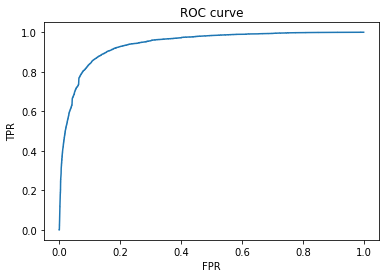

In [15]:

from sklearn import metrics
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
fpr, tpr, threshold  = roc_curve(y, preds)

plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.savefig("gdrive/My Drive/bmdslab/final/number13.png")
threshold

errors = (0 - fpr)**2 + (1 - tpr)**2
minerror = min(errors)
minerrorindex = np.where(errors == minerror)
correctthreshold = threshold[minerrorindex]
print('threshold with least error')
print(correctthreshold)
print('true postive rate at threshold')
print(tpr[minerrorindex])
print('false positive rate at threshold')
print(fpr[minerrorindex])


auc = metrics.auc(fpr, tpr)
print('auc')
print(auc)

In [16]:
clf = SGDClassifier(loss="log", penalty="l1", alpha = correctalpha, class_weight = 'balanced')
clf.fit(X,y)

coefficientsoffeatures = clf.coef_

print("These are the coefficients of each feature, since features are normalized, magnitude of feature shows importance and effect")
print(coefficientsoffeatures)


predicts = clf.predict_proba(Xprime)
predicts = predicts[:,1]

numrowtest = 1302378
for num in range(numrowtest):
   
  if predicts[num] >= correctthreshold:
    predicts[num] = 1
  else:
    predicts[num] = 0
predicts


These are the coefficients of each feature, since features are normalized, magnitude of feature shows importance and effect
[[ 0.41908774 -2.31955577  0.          0.          0.39577411 -0.01859813
   0.          0.14944109  0.18885415 -2.17700452  0.          0.
   0.          1.7818006   0.          0.          0.         -0.11826862
   0.          0.02145851  0.         -0.52660218  0.29606683 -1.87478211
   1.42740597  0.16737193  0.          0.10127484]]


array([0., 0., 0., ..., 0., 0., 0.])

In [17]:
print(list(zip(clf.coef_, Xprime)))

[(array([ 0.41908774, -2.31955577,  0.        ,  0.        ,  0.39577411,
       -0.01859813,  0.        ,  0.14944109,  0.18885415, -2.17700452,
        0.        ,  0.        ,  0.        ,  1.7818006 ,  0.        ,
        0.        ,  0.        , -0.11826862,  0.        ,  0.02145851,
        0.        , -0.52660218,  0.29606683, -1.87478211,  1.42740597,
        0.16737193,  0.        ,  0.10127484]), array([ 7.10000000e+01,  1.34000000e+02,  1.02000000e+02,  1.11000000e+02,
        2.00000000e+01,  3.70555765e+01,  1.53093456e+01,  1.27185075e+02,
        2.44471344e+01,  9.26803479e+00,  1.03357793e+01,  2.32129378e+02,
        6.06592288e+00,  1.89352505e+00,  3.50510979e+01,  7.47517744e+00,
        1.30008941e+01,  3.77991306e+01,  1.09318664e+01,  3.06245091e+01,
        5.80823504e+00, -4.79645648e-17, -1.84934051e-16, -1.75990283e-16,
        1.10508043e+00,  1.00689523e-16,  7.32811998e-17, -3.28358919e-17]))]


In [0]:


preds=predicts
from datetime import datetime
datelistonsets = []




for i in range(1114):

  dfDateTimeonsets = dfonsets.iloc[i]['x']

  dataDateTimeObjonset = datetime.strptime(dfDateTimeonsets, '%Y-%m-%d %H:%M:%S')

  datelistonsets.append(dataDateTimeObjonset)

In [0]:
        #dftimestamp=pd.read_csv('gdrive/My Drive/bmdslab/final/timestamps.test.csv') 
#dftimestamps = dftimestamp


from datetime import datetime
datelist = []




for i in range(1302378):

  dfDateTime = dftimestamps.iloc[i]['x']

  dataDateTimeObj = datetime.strptime(dfDateTime, '%Y-%m-%d %H:%M:%S')

  datelist.append(dataDateTimeObj)

  

 




In [20]:
patientnum = dftest['patient']
patientnum

0             1
1             1
2             1
3             1
4             1
5             1
6             1
7             1
8             1
9             1
10            1
11            1
12            1
13            1
14            1
15            1
16            1
17            1
18            1
19            1
20            1
21            1
22            1
23            1
24            1
25            1
26            1
27            1
28            1
29            1
           ... 
1302348    6737
1302349    6737
1302350    6737
1302351    6737
1302352    6737
1302353    6737
1302354    6737
1302355    6737
1302356    6737
1302357    6737
1302358    6737
1302359    6737
1302360    6737
1302361    6737
1302362    6737
1302363    6737
1302364    6737
1302365    6737
1302366    6737
1302367    6737
1302368    6737
1302369    6737
1302370    6737
1302371    6737
1302372    6737
1302373    6737
1302374    6737
1302375    6737
1302376    6737
1302377    6737
Name: patient, Length: 1

In [0]:
initialind = 6738 - 1114;
lastofpatients = []
for i2 in range (initialind, 6738):
   lastofpatients.append(i2)
lastofpatients = np.asarray(lastofpatients)

In [0]:

currentpatientnum = 1

indexyprime = np.zeros(6737)
indexpred = np.zeros(6737)

for i in range(1302378):
  currentpatientnum = patientnum[i]
  if (preds[i] == 1):     
    if (indexpred[currentpatientnum-1] == 0):
      indexpred[currentpatientnum-1] = i;
     

In [0]:
initialind = 6737 - 1114;
lastofpatients = []
for i2 in range (initialind, 6737):
   lastofpatients.append(indexpred[i2])
lastofpatients = np.asarray(lastofpatients)

 
  
lastofpatients = lastofpatients.astype(int)

In [0]:
lastofpatientsDTOBJS = [] 
for m in range(1114):
  
  if (lastofpatients[m] != 0):
    lastofpatientsDTOBJS.append(datelist[lastofpatients[m]])
  else:
    lastofpatientsDTOBJS.append(datelistonsets[m])

46740.0
10560.0
1500.0
69300.0
9060.0
6420.0
51300.0
1800.0
43200.0
149400.0
378300.0
9060.0
38700.0
311400.0
201600.0
7560.0
3660.0
4500.0
6900.0
1800.0
14400.0
51300.0
2400.0
3000.0
9900.0
27900.0
3600.0
2969100.0


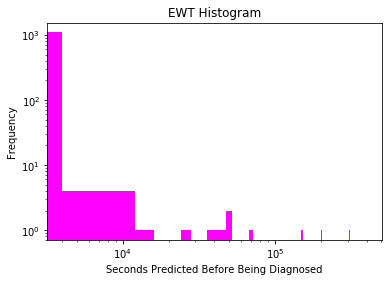

In [25]:
timestampschanges = []
for i in range(len(lastofpatientsDTOBJS)):
  timestampschanges.append((datelistonsets[i] - lastofpatientsDTOBJS[i]).total_seconds()) 
  
plt.hist(timestampschanges, log='true', color='magenta', bins=100, range=[0,400000] )
plt.title('EWT Histogram')
plt.xlabel('Seconds Predicted Before Being Diagnosed')
plt.ylabel('Frequency')
plt.xscale('log')
plt.savefig("gdrive/My Drive/bmdslab/final/number14.png")

timestampnew=np.asarray(timestampschanges)
for i in range(1114):
  if(timestampnew[i]!=0):
    print(timestampnew[i])

# Note for PART G to Graders: We used data balancing for all of the other parts so for PART G, we will take it out and see results.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
import random as rnd
import torch
import json

# inline plots
%matplotlib inline

from google.colab import drive
drive.mount('gdrive/')

Drive already mounted at gdrive/; to attempt to forcibly remount, call drive.mount("gdrive/", force_remount=True).


In [0]:
df=pd.read_csv('gdrive/My Drive/bmdslab/final/glm.training.data.csv')
dftest=pd.read_csv('gdrive/My Drive/bmdslab/final/glm.test.data.csv')
dftimestamps=pd.read_csv('gdrive/My Drive/bmdslab/final/timestamps.test.csv')
dfonsets=pd.read_csv('gdrive/My Drive/bmdslab/final/test.onsets.csv')

In [0]:
X=df[df.columns[df.columns!='y'] ].drop(df.columns[0], axis=1)
y=df[['y']]


In [0]:
y=y.to_numpy()
X=X.to_numpy()


from sklearn import preprocessing    
from sklearn.preprocessing import StandardScaler

StandardScaler(copy=True, with_mean=True, with_std=True)
scaler = preprocessing.StandardScaler().fit(X)


X = scaler.transform(X)  

y=np.hstack(y)

In [0]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10)

In [31]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
numalphas = 9
accuracy_matrix = np.zeros((10,numalphas))
currentrow = -1
currentcol = -1;
alphasspec = [10**(-6), 10**(-5), 10**(-4), 10**(-3.5), 10**(-3), 10**(-2.5), 10**(-2.25), 10**(-2), 10**(-1)]

for train_index, test_index in kf.split(X,y):
     
    data_train   = X[train_index]
    target_train = y[train_index]

    data_test    = X[test_index]
    target_test  = y[test_index]
    
    currentrow = currentrow + 1;
    
    for i in alphasspec:

      clf = SGDClassifier(loss="log", penalty="l1", alpha = i, max_iter=5)
      clf.fit(data_train,target_train)
      preds = clf.predict(data_test)
      try:
        accuracy=roc_auc_score(target_test,preds)
      except ValueError:
        pass 
      
      currentcol = currentcol + 1;
      accuracy_matrix[currentrow,currentcol] = accuracy

    currentcol = -1;
    
nsum = 0   

accuracy_matrix_avg = np.zeros(numalphas)   
for col in range (numalphas):
  
  for row in range(10):
    nsum = nsum + accuracy_matrix[row,col]
   
  accuracy_matrix_avg[col] = nsum / 10;
  nsum = 0;

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/

The best lambda to use in the list is:
[0.00031623]
This tells us the magnitude of lambda values to test


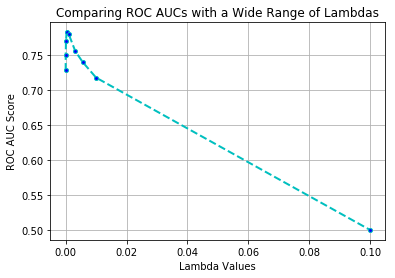

In [32]:
alphasspec = np.asarray(alphasspec)
correctalpha = alphasspec[np.where(accuracy_matrix_avg == np.amax(accuracy_matrix_avg))]
print('The best lambda to use in the list is:')
print(correctalpha)
print('This tells us the magnitude of lambda values to test')

fig, ax = plt.subplots()
ax.plot(alphasspec, accuracy_matrix_avg,  color='c', markerfacecolor='b', marker='o', linestyle='dashed', linewidth=2, markersize=4)

ax.set(xlabel='Lambda Values', ylabel='ROC AUC Score', title='Comparing ROC AUCs with a Wide Range of Lambdas')
ax.grid()
plt.savefig("gdrive/My Drive/bmdslab/final/number11g.png")

In [33]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
numalphas = 12
accuracy_matrix = np.zeros((10,numalphas))
currentrow = -1
currentcol = -1;
alphasspec = [correctalpha*(0.3), correctalpha*(0.4), correctalpha*(0.5), correctalpha*(0.6),correctalpha*(0.7), correctalpha*(0.8), correctalpha*(0.9), correctalpha, correctalpha*(2), correctalpha*(3), correctalpha*(4), correctalpha*(5)]

for train_index, test_index in kf.split(X,y):
     
    data_train   = X[train_index]
    target_train = y[train_index]

    data_test    = X[test_index]
    target_test  = y[test_index]
    
    currentrow = currentrow + 1;
    
    for i in alphasspec:

      clf = SGDClassifier(loss="log", penalty="l1", alpha = i, max_iter=5)
      clf.fit(data_train,target_train)
      preds = clf.predict(data_test)
      try:
        accuracy=roc_auc_score(target_test,preds)
      except ValueError:
        pass 
      
      currentcol = currentcol + 1;
      accuracy_matrix[currentrow,currentcol] = accuracy

    currentcol = -1;
    
nsum = 0   

accuracy_matrix_avg = np.zeros(numalphas)   
for col in range (numalphas):
  
  for row in range(10):
    nsum = nsum + accuracy_matrix[row,col]
   
  accuracy_matrix_avg[col] = nsum / 10;
  nsum = 0;


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/

The best lambda to use in the list is:
[[0.00018974]]
This tells us a precise value of lambda to use


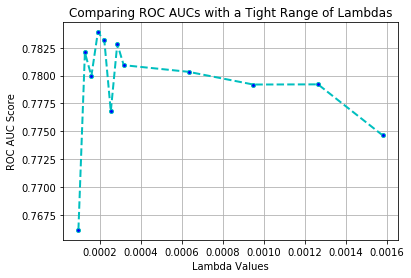

In [34]:
alphasspec = np.asarray(alphasspec)
correctalpha = alphasspec[np.where(accuracy_matrix_avg == np.amax(accuracy_matrix_avg))]
print('The best lambda to use in the list is:')
print(correctalpha)
print('This tells us a precise value of lambda to use')

fig, ax = plt.subplots()
ax.plot(alphasspec, accuracy_matrix_avg,  color='c', markerfacecolor='b', marker='o', linestyle='dashed', linewidth=2, markersize=4)
ax.set(xlabel='Lambda Values', ylabel='ROC AUC Score', title='Comparing ROC AUCs with a Tight Range of Lambdas')
ax.grid()
plt.savefig("gdrive/My Drive/bmdslab/final/number12g.png")

In [0]:
dftestnew=dftest[dftest.columns[dftest.columns!='patient']].drop(dftest.columns[0], axis=1)
dfnew=dftestnew[dftestnew.columns[dftestnew.columns!='y']]
yprime=dftest[['y']]
yprime=yprime.to_numpy()
Xprime=dfnew.to_numpy()

from sklearn import preprocessing    
from sklearn.preprocessing import StandardScaler

StandardScaler(copy=True, with_mean=True, with_std=True)
scaler = preprocessing.StandardScaler().fit(X)


Xprime = scaler.transform(Xprime)   

In [0]:
yprime=np.hstack(yprime)

In [37]:
coefficientsoffeatures = clf.coef_

print("These are the coefficients of each feature, since features are normalized, magnitude of feature shows importance and effect")
print(coefficientsoffeatures)


preds = clf.predict_proba(X)

These are the coefficients of each feature, since features are normalized, magnitude of feature shows importance and effect
[[ 0.40769035 -1.78228567  0.          0.          0.24433221  0.
   0.          0.11010252  0.14636765 -2.08815591  0.          0.
   0.          0.8367092   0.          0.          0.         -0.14879087
   0.          0.03535082  0.         -0.66353611  0.24315937 -1.83994303
   1.25816589  0.16483667  0.0247882   0.04899796]]


In [38]:
preds
preds = preds[:,1]
len(preds)
preds

array([0.16071223, 0.16071223, 0.16071223, ..., 0.67758755, 0.67758755,
       0.67758755])

threshold with least error
[0.17145317]
true postive rate at threshold
[0.86485605]
false positive rate at threshold
[0.13099415]
auc
0.9339770839865862


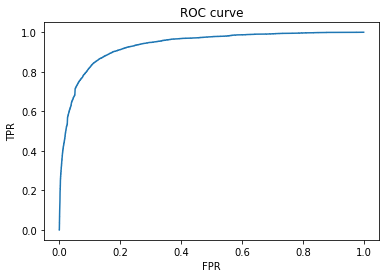

In [39]:

from sklearn import metrics
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
fpr, tpr, threshold  = roc_curve(y, preds)

plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.savefig("gdrive/My Drive/bmdslab/final/number13.png")
threshold

errors = (0 - fpr)**2 + (1 - tpr)**2
minerror = min(errors)
minerrorindex = np.where(errors == minerror)
correctthreshold = threshold[minerrorindex]
print('threshold with least error')
print(correctthreshold)
print('true postive rate at threshold')
print(tpr[minerrorindex])
print('false positive rate at threshold')
print(fpr[minerrorindex])


auc = metrics.auc(fpr, tpr)
print('auc')
print(auc)

In [40]:
clf = SGDClassifier(loss="log", penalty="l1", alpha = correctalpha)
clf.fit(X,y)

coefficientsoffeatures = clf.coef_

print("These are the coefficients of each feature, since features are normalized, magnitude of feature shows importance and effect")
print(coefficientsoffeatures)


predicts = clf.predict_proba(Xprime)
predicts = predicts[:,1]

numrowtest = 1302378
for num in range(numrowtest):
   
  if predicts[num] >= correctthreshold:
    predicts[num] = 1
  else:
    predicts[num] = 0
predicts

These are the coefficients of each feature, since features are normalized, magnitude of feature shows importance and effect
[[ 0.41305205 -2.27269852  0.          0.01106635  0.35688148 -0.04783281
   0.          0.14683667  0.16359429 -2.2170635   0.         -0.03550165
   0.          0.79425256  0.         -0.01580043  0.         -0.22336514
   0.          0.06090296  0.         -0.68957604  0.28785719 -2.02545199
   1.28670461  0.20345127  0.00311638  0.04197738]]


array([0., 0., 0., ..., 0., 0., 0.])

In [41]:
print(list(zip(clf.coef_, Xprime)))

[(array([ 0.41305205, -2.27269852,  0.        ,  0.01106635,  0.35688148,
       -0.04783281,  0.        ,  0.14683667,  0.16359429, -2.2170635 ,
        0.        , -0.03550165,  0.        ,  0.79425256,  0.        ,
       -0.01580043,  0.        , -0.22336514,  0.        ,  0.06090296,
        0.        , -0.68957604,  0.28785719, -2.02545199,  1.28670461,
        0.20345127,  0.00311638,  0.04197738]), array([ 7.10000000e+01,  1.34000000e+02,  1.02000000e+02,  1.11000000e+02,
        2.00000000e+01,  3.70555765e+01,  1.53093456e+01,  1.27185075e+02,
        2.44471344e+01,  9.26803479e+00,  1.03357793e+01,  2.32129378e+02,
        6.06592288e+00,  1.89352505e+00,  3.50510979e+01,  7.47517744e+00,
        1.30008941e+01,  3.77991306e+01,  1.09318664e+01,  3.06245091e+01,
        5.80823504e+00, -4.79645648e-17, -1.84934051e-16, -1.75990283e-16,
        1.10508043e+00,  1.00689523e-16,  7.32811998e-17, -3.28358919e-17]))]


In [0]:


preds=predicts
from datetime import datetime
datelistonsets = []




for i in range(1114):

  dfDateTimeonsets = dfonsets.iloc[i]['x']

  dataDateTimeObjonset = datetime.strptime(dfDateTimeonsets, '%Y-%m-%d %H:%M:%S')

  datelistonsets.append(dataDateTimeObjonset)

In [0]:
 

from datetime import datetime
datelist = []




for i in range(1302378):

  dfDateTime = dftimestamps.iloc[i]['x']

  dataDateTimeObj = datetime.strptime(dfDateTime, '%Y-%m-%d %H:%M:%S')

  datelist.append(dataDateTimeObj)

 

In [44]:
patientnum = dftest['patient']
patientnum

0             1
1             1
2             1
3             1
4             1
5             1
6             1
7             1
8             1
9             1
10            1
11            1
12            1
13            1
14            1
15            1
16            1
17            1
18            1
19            1
20            1
21            1
22            1
23            1
24            1
25            1
26            1
27            1
28            1
29            1
           ... 
1302348    6737
1302349    6737
1302350    6737
1302351    6737
1302352    6737
1302353    6737
1302354    6737
1302355    6737
1302356    6737
1302357    6737
1302358    6737
1302359    6737
1302360    6737
1302361    6737
1302362    6737
1302363    6737
1302364    6737
1302365    6737
1302366    6737
1302367    6737
1302368    6737
1302369    6737
1302370    6737
1302371    6737
1302372    6737
1302373    6737
1302374    6737
1302375    6737
1302376    6737
1302377    6737
Name: patient, Length: 1

In [0]:
initialind = 6738 - 1114;
lastofpatients = []
for i2 in range (initialind, 6738):
   lastofpatients.append(i2)
lastofpatients = np.asarray(lastofpatients)

In [0]:
currentpatientnum = 1

indexyprime = np.zeros(6737)
indexpred = np.zeros(6737)

for i in range(1302378):
  currentpatientnum = patientnum[i]
  if (preds[i] == 1):     
    if (indexpred[currentpatientnum-1] == 0):
      indexpred[currentpatientnum-1] = i;
     

In [0]:
initialind = 6737 - 1114;
lastofpatients = []
for i2 in range (initialind, 6737):
   lastofpatients.append(indexpred[i2])
lastofpatients = np.asarray(lastofpatients)

 
  
lastofpatients = lastofpatients.astype(int)

In [0]:
lastofpatientsDTOBJS = [] 
for m in range(1114):
  
  if (lastofpatients[m] != 0):
    lastofpatientsDTOBJS.append(datelist[lastofpatients[m]])
  else:
    lastofpatientsDTOBJS.append(datelistonsets[m])

46740.0
10560.0
69300.0
9060.0
51300.0
1800.0
43200.0
149400.0
378300.0
9060.0
38700.0
311400.0
201600.0
7560.0
4500.0
6900.0
1800.0
14400.0
51300.0
2400.0
3000.0
9900.0
27900.0
3600.0
2969100.0


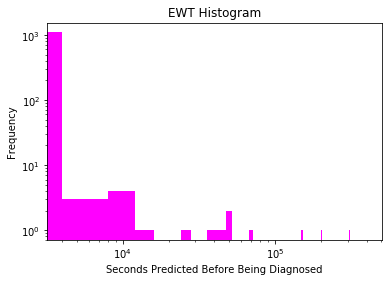

In [49]:
timestampschanges = []
for i in range(len(lastofpatientsDTOBJS)):
  timestampschanges.append((datelistonsets[i] - lastofpatientsDTOBJS[i]).total_seconds()) 
  
plt.hist(timestampschanges, log='true', color='magenta', bins=100, range=[0,400000] )
plt.title('EWT Histogram')
plt.xlabel('Seconds Predicted Before Being Diagnosed')
plt.ylabel('Frequency')
plt.xscale('log')
plt.savefig("gdrive/My Drive/bmdslab/final/number14.png")

timestampnew=np.asarray(timestampschanges)
for i in range(1114):
  if(timestampnew[i]!=0):
    print(timestampnew[i])

PART G: Comparing results of with data balancing and without data balancing.

code in part g shows run through without data balancing, since we initially used data balancing to complete the other questions of the lab




Wiithout data balancing, the threshold used to classify labels is much lower , the TPR is slightly lower, the FPR is slightly higher, and the AUC is lower. This means that data balancing slightly increases the performance of our model for finding predictions. This was shown when we plotted the histograms of EWT. In the first histogram, 28 cases of correct prediction were found beforehand with databalancing. In the second histogram, corresponding to without data balancing, only 25 cases of correct predictions were detected beforehand. The extra correct predictions in the first histogram can be found by comparing the EWT values we print out for each histogram. You will be able to see that the EWTs 1500, 3660, and 6420 are found in the first set of EWTS, but not the second set. Overall, databalancing increased the performace of our model and helped predict mores occurence of septic shock pre diagnosis. All other EWT predictions, besides the three specifically mentioned, were found after applying both models.
